In [ ]:
#importing dependenies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
employee_data= pd.read_csv('/content/HR-Employee-Attrition.csv', encoding = 'ISO-8859-1')
employee_data.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#checking the shape of employee data
employee_data.shape

(1470, 35)

# Data preprocessing

In [ ]:
#checking the null value
employee_data.isnull().sum()

ï»¿Age                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ï»¿Age                    1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_data.columns.tolist()

['ï»¿Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
#remove duplicate if there is present
employee_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [ ]:
#rename the age columns
employee_data= employee_data.rename(columns={'ï»¿Age':'Age'})
employee_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
#finding correlation between columns
employee_data.corr().head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
employee_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
#calculating the percentage of attrition rate
100*employee_data['Attrition'].value_counts()/len(employee_data['Attrition'])

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

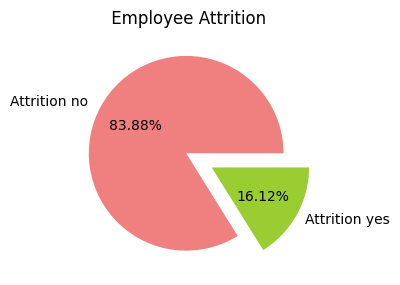

In [ ]:
# Plot into pie chart to see promotion of last 5years
labels= 'Attrition no ', "Attrition yes"

plt.figure(figsize=(4, 4))
colors=['lightcoral', 'yellowgreen']

plt.pie(x = employee_data["Attrition"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0.3])

plt.title(" Employee Attrition")
plt.tight_layout()
plt.show()

In [ ]:
employee_data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [ ]:
#removing unuse feature from dataframe
employee_data.drop(columns=['StandardHours', 'EmployeeCount', 'Over18', 'EducationField','DailyRate',
                                           'EmployeeNumber'],inplace=True, axis= 1)


In [ ]:
employee_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,3,Male,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,Male,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,4,Female,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,1,Male,40,3,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
employee_data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

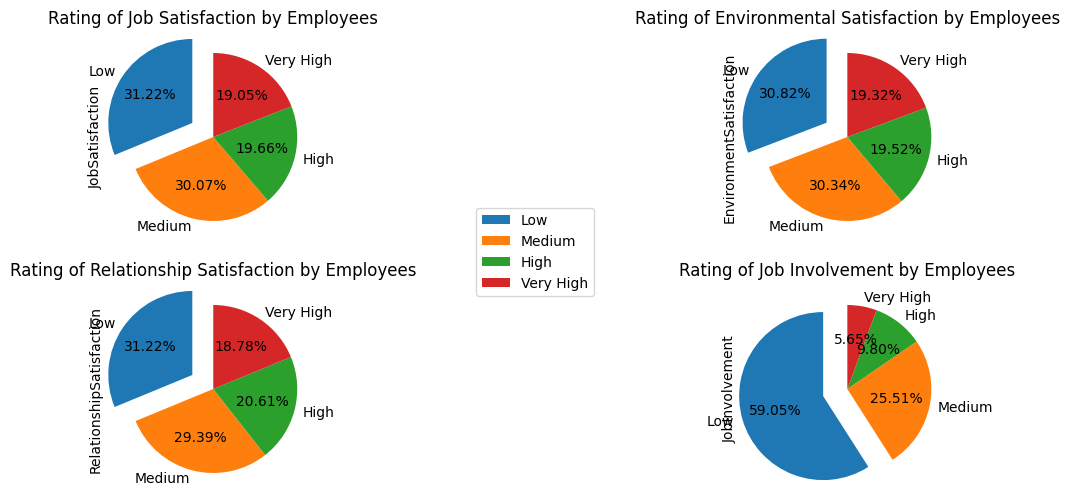

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels = 'Low','Medium','High','Very High'

employee_data['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%',
                            startangle=90,
                            explode=[0.3,0,0, 0],
                            labels=labels,ax=ax1)
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

employee_data['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%',
                            startangle=90,
                            explode=[0.3, 0, 0, 0],
                            labels=labels,ax=ax2)
ax2.set_title('Rating of Environmental Satisfaction by Employees')

employee_data['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%',
                            startangle=90,
                           explode=[0.3, 0, 0, 0],
                            labels=labels,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

employee_data['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%',
                            startangle=90,
                            labels=labels,
                            explode=[0.3, 0, 0, 0], ax=ax4)
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

In [ ]:
employee_data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

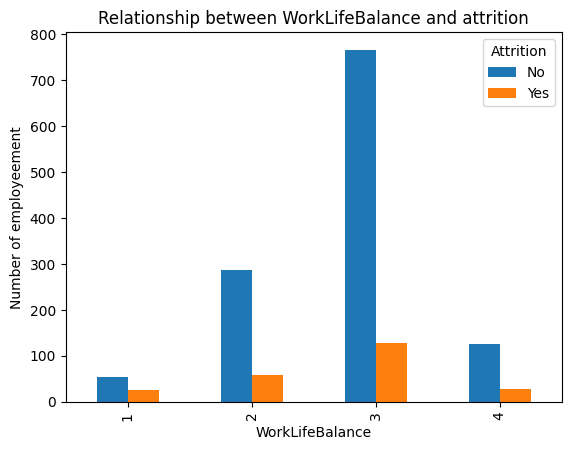

In [ ]:
data= employee_data.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("Relationship between WorkLifeBalance and attrition")
plt.ylabel("Number of employeement")
plt.show()

In [ ]:
employee_data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

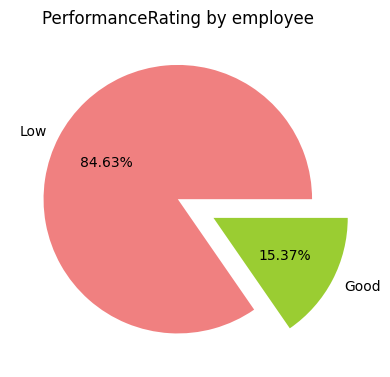

In [ ]:
#plotting PerformanceRatingin pie plot
labels= 'Low','Good'
plt.figure(figsize=(4, 4))
colors=['lightcoral', 'yellowgreen']
plt.pie(x = employee_data["PerformanceRating"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0.3])
plt.title("PerformanceRating by employee")
plt.tight_layout()
plt.show()

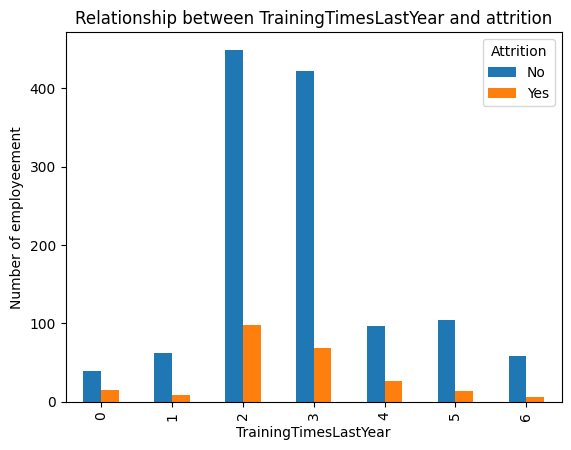

In [ ]:
data= employee_data.groupby('TrainingTimesLastYear')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("Relationship between TrainingTimesLastYear and attrition")
plt.ylabel("Number of employeement")
plt.show()

# reletionship between businesstravel and attrition

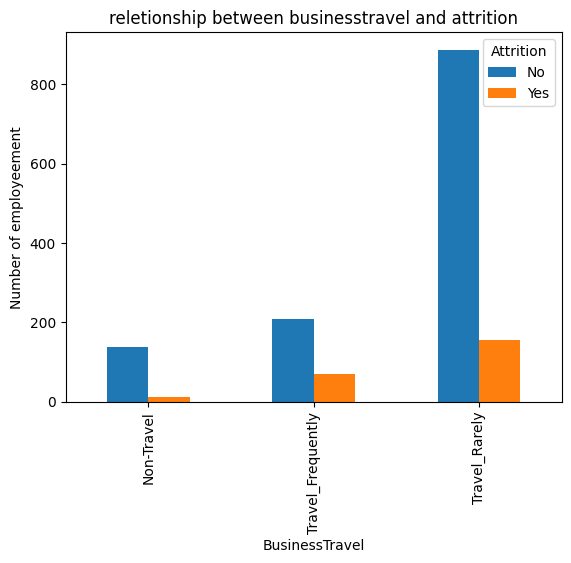

In [ ]:
#relationship between businesstravel and attrition
data= employee_data.groupby('BusinessTravel')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("reletionship between businesstravel and attrition")
plt.ylabel('Number of employeement')
plt.show()

In [ ]:
#analysis of work experience
data=employee_data[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                             'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
data.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


# Relationship between work expericence and Attrition

In [ ]:
list= ['YearsAtCompany', 'YearsWithCurrManager','YearsInCurrentRole','YearsSinceLastPromotion',
      'TotalWorkingYears']

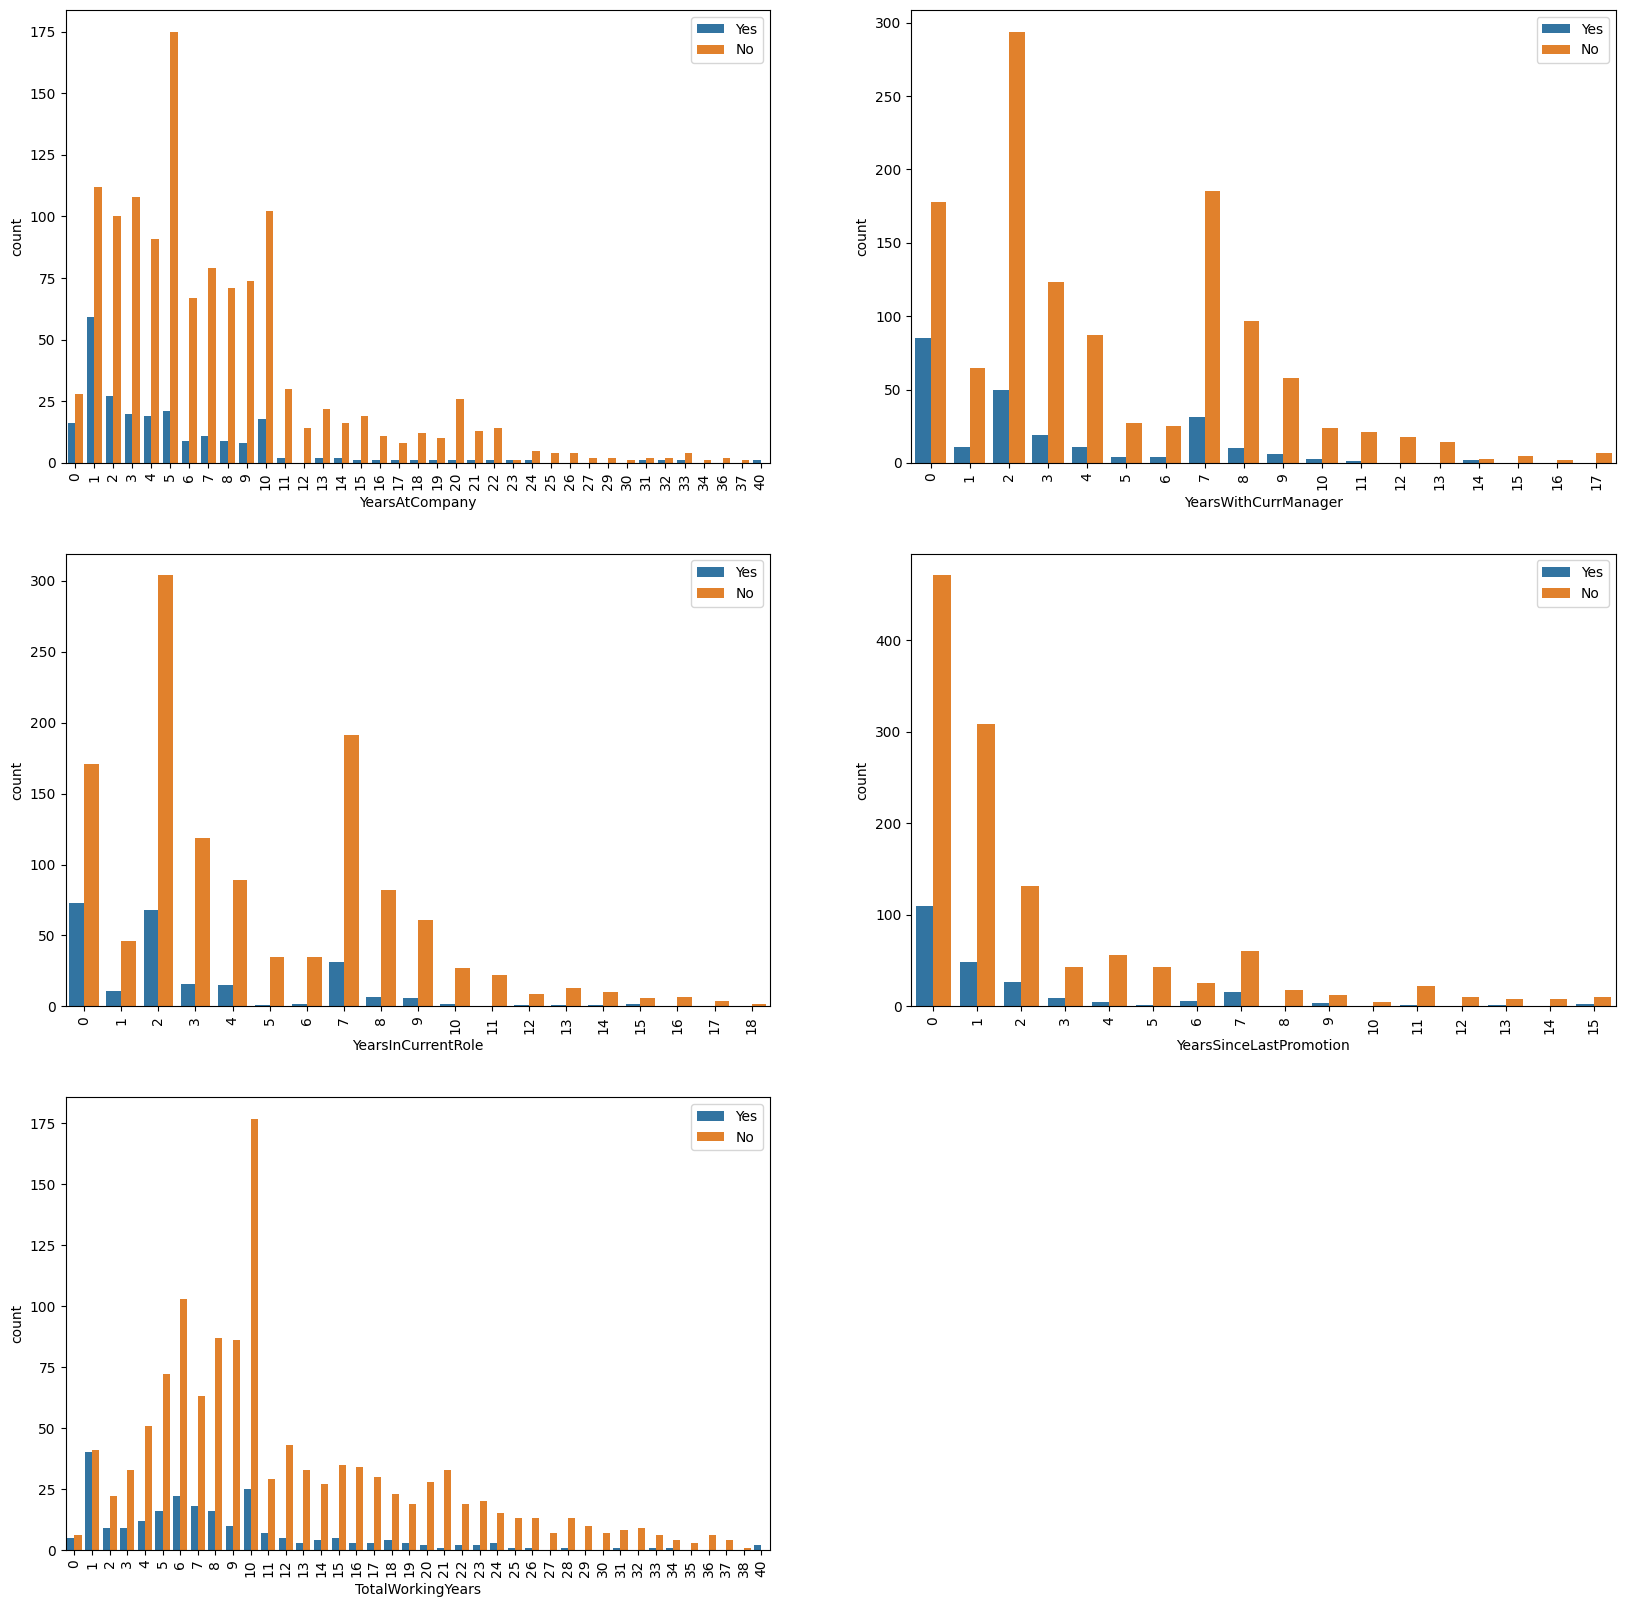

In [ ]:
fig= plt.subplots(figsize=(20, 20))

for p, q in enumerate(list):
    plt.subplot(3, 2, p+1)
    plt.subplots_adjust(hspace=0.2)
    sns.countplot(x=q, data= employee_data, hue='Attrition')
    plt.legend(loc='upper right')
    plt.xticks(rotation=90)


# Monthly Income and Attrition

In [ ]:
print(employee_data['MonthlyIncome'].max())
employee_data['MonthlyIncome'].min()

19999


1009

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

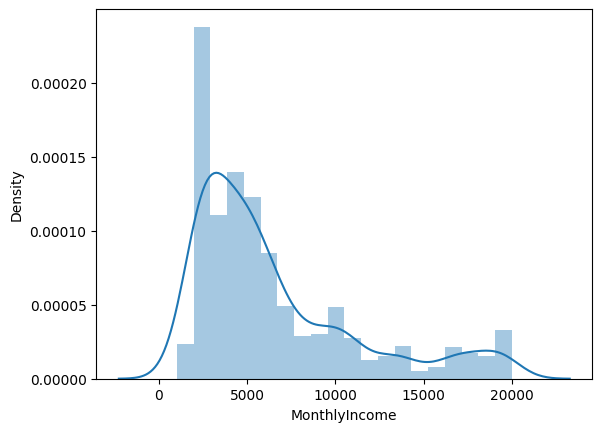

In [ ]:
sns.distplot(employee_data['MonthlyIncome'])

In [ ]:
monthly_income = employee_data[employee_data['Attrition']=='Yes']['MonthlyIncome']
monthly_income = monthly_income.reset_index()
monthly_income.drop(['index'], axis=1, inplace=True)


monthly_no = employee_data[employee_data['Attrition']=='No']['MonthlyIncome']
monthly_no= monthly_no.reset_index()
monthly_no.drop(['index'], axis=1, inplace=True)

monthly_income['monthly_no'] = monthly_no
monthly_income.rename(columns={'MonthlyIncome':'Yes', 'monthly_no':'No'}, inplace=True)
monthly_income.head()


,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


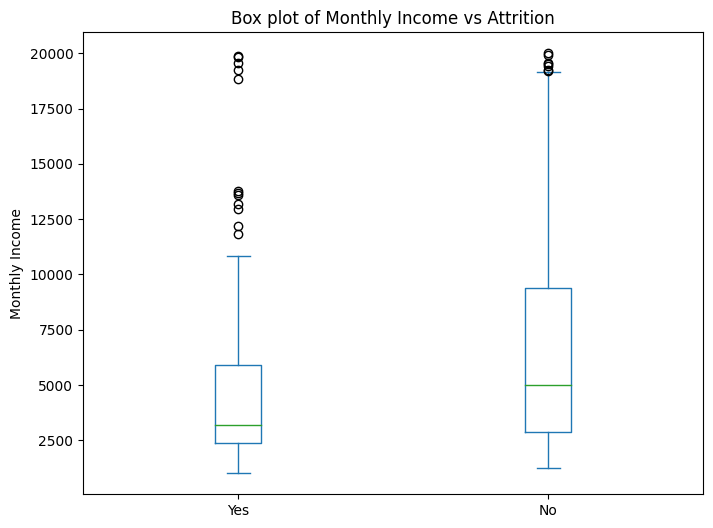

In [ ]:
monthly_income.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

In [ ]:
employee_data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<Axes: ylabel='Frequency'>

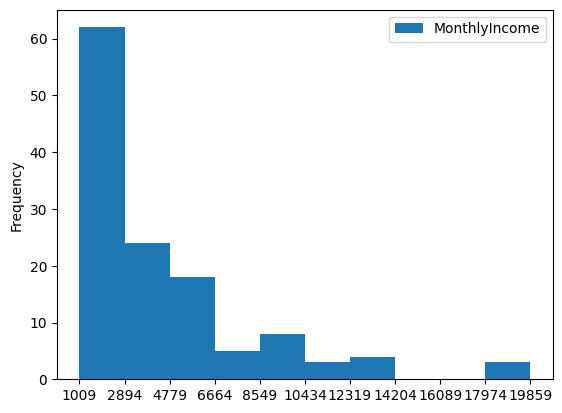

In [ ]:
attrition = employee_data[['OverTime', 'MonthlyIncome', 'Attrition']]

data = attrition[(employee_data['OverTime']=='Yes') & (employee_data['Attrition']=='Yes')]
data= data.sort_values(by = 'MonthlyIncome', ascending=False, axis=0)
count, bin_edges = np.histogram(data['MonthlyIncome'])

data.plot(kind='hist', xticks=bin_edges)

<Axes: ylabel='Frequency'>

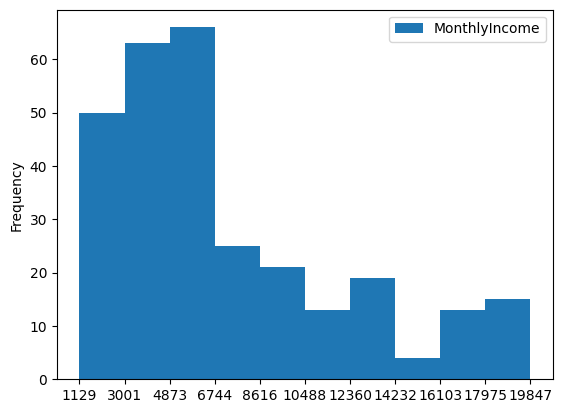

In [ ]:
data1 = attrition[(employee_data['OverTime']=='Yes') & (employee_data['Attrition']=='No')]
count, bin_edges = np.histogram(data1['MonthlyIncome'])

data1.plot(kind='hist', xticks=bin_edges)

<Axes: ylabel='Frequency'>

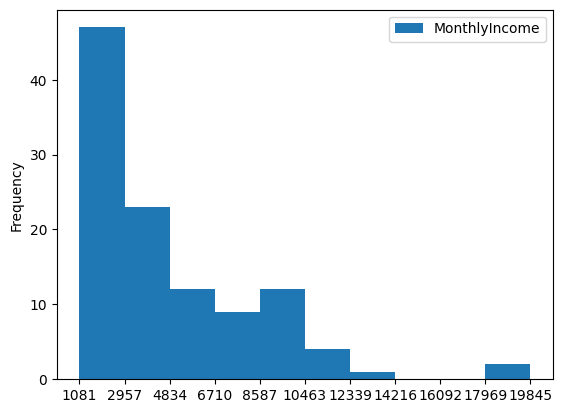

In [ ]:
data2 = attrition[(employee_data['OverTime']=='No') & (employee_data['Attrition']=='Yes')]
count, bin_edges = np.histogram(data2['MonthlyIncome'])
data2.plot(kind='hist', xticks=bin_edges)

In [ ]:
sns.lineplot(employee_data['HourlyRate'],employee_data['MonthlyIncome'])

TypeError: ignored


# Department and attrition

In [ ]:
department= employee_data[['Department', 'Attrition']].value_counts()
department

Department              Attrition
Research & Development  No           828
Sales                   No           354
Research & Development  Yes          133
Sales                   Yes           92
Human Resources         No            51
                        Yes           12
dtype: int64

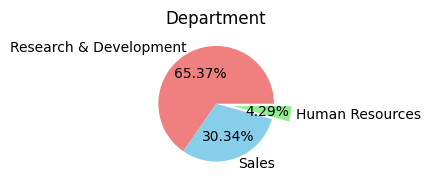

In [ ]:
#department columns
plt.figure(figsize=(4, 4))
labels= ['Research & Development', 'Sales', 'Human Resources']
colors=['lightcoral', 'skyblue','lightgreen']
plt.pie(x = employee_data["Department"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0, 0.3])
plt.title("Department")
plt.tight_layout()
plt.show()

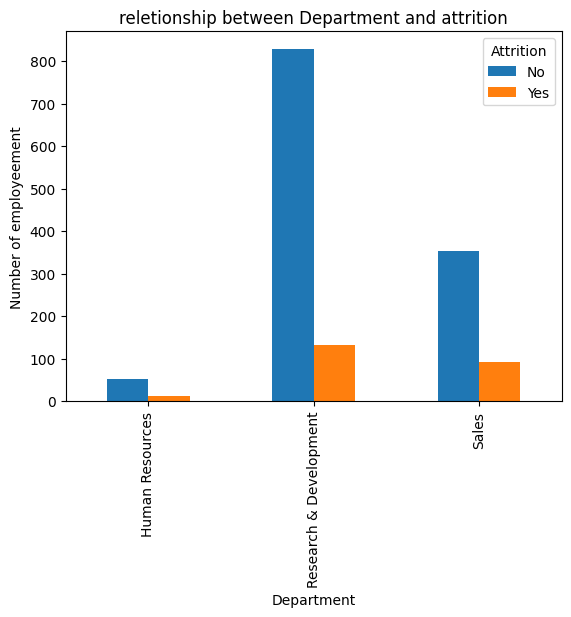

In [ ]:
data= employee_data.groupby('Department')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("reletionship between Department and attrition")
plt.ylabel('Number of employeement')
plt.xticks(rotation=90)
plt.show()

In [ ]:
department= employee_data[['JobRole', 'Attrition']].value_counts()
department.head()

JobRole                    Attrition
Sales Executive            No           269
Research Scientist         No           245
Laboratory Technician      No           197
Manufacturing Director     No           135
Healthcare Representative  No           122
dtype: int64

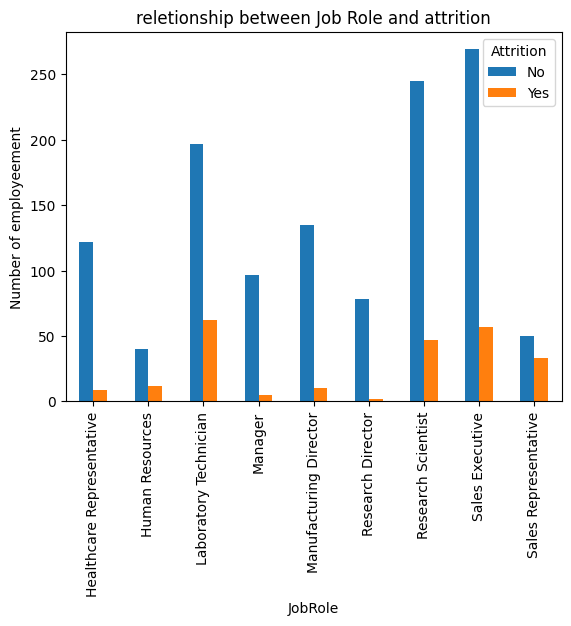

In [ ]:
#relationship between department and attrition
data= employee_data.groupby('JobRole')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("reletionship between Job Role and attrition")
plt.ylabel('Number of employeement')
plt.xticks(rotation=90)
plt.show()

# Gender

In [ ]:
gender= employee_data[['Gender', 'DistanceFromHome', 'Attrition']]
gender.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [ ]:
employee_data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

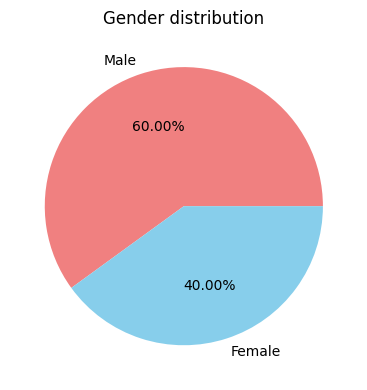

In [ ]:
#gender columns
plt.figure(figsize=(4, 4))
labels= ['Male', 'Female']
colors=['lightcoral', 'skyblue']
plt.pie(x = employee_data["Gender"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0])
plt.title("Gender distribution")
plt.tight_layout()
plt.show()

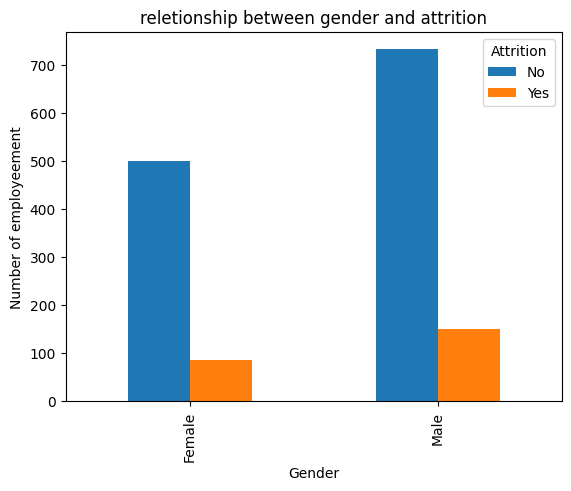

In [ ]:
#relationship between gender and attrition
data= employee_data.groupby('Gender')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("reletionship between gender and attrition")
plt.ylabel('Number of employeement')
plt.show()

# Marital Status

In [ ]:
marital_status= employee_data[['MaritalStatus', 'Attrition']]
marital_status.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [ ]:
employee_data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

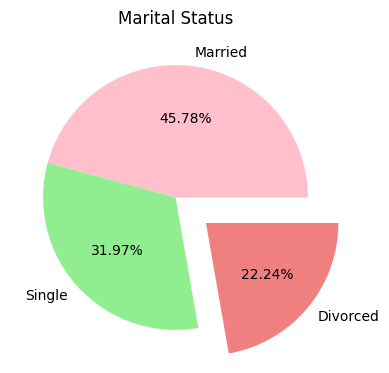

In [ ]:
#maritalStatus columns
plt.figure(figsize=(4, 4))
labels= ['Married', 'Single', 'Divorced']
colors=['pink','lightgreen','lightcoral']
plt.pie(x = employee_data["MaritalStatus"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0, 0.3])
plt.title("Marital Status")
plt.tight_layout()
plt.show()

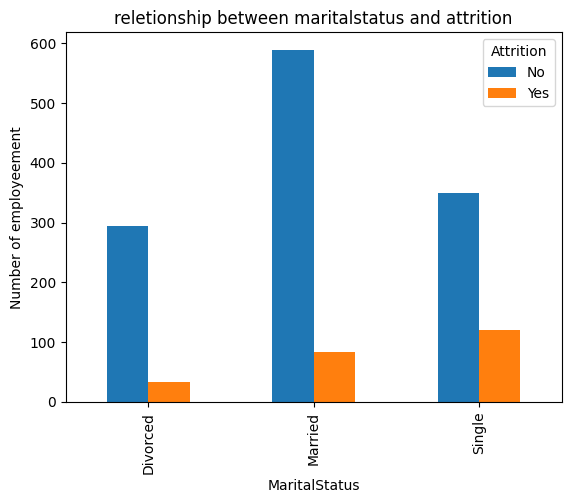

In [ ]:
#relationship between marital status and attrition
data= employee_data.groupby('MaritalStatus')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("reletionship between maritalstatus and attrition")
plt.ylabel('Number of employeement')
plt.show()

In [ ]:
sns.lineplot(employee_data['HourlyRate'],employee_data['MonthlyRate'])

TypeError: ignored

# Age and Attrition relationship

In [ ]:
data= employee_data.groupby('Age')['Attrition'].value_counts(normalize=False).unstack()
data.head()

Attrition,No,Yes
Age,,
18,4.0,4.0
19,3.0,6.0
20,5.0,6.0
21,7.0,6.0
22,11.0,5.0


In [ ]:
sns.lineplot(employee_data['Age'],employee_data['Attrition'])

TypeError: ignored

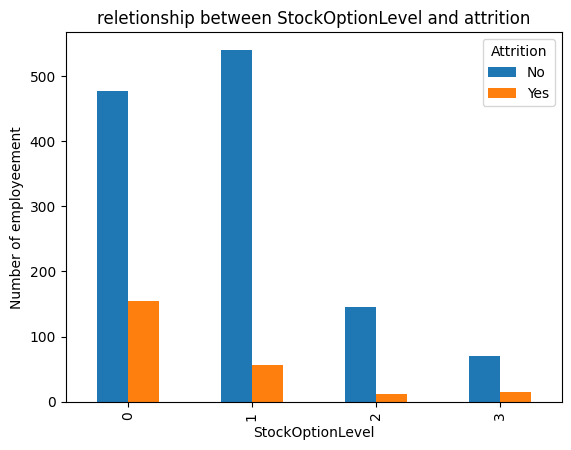

In [ ]:
#relationship between stock option level and attrition
data= employee_data.groupby('StockOptionLevel')['Attrition'].value_counts(normalize=False).unstack()
data.plot(kind='bar', alpha=1, stacked=False)
plt.title("reletionship between StockOptionLevel and attrition")
plt.ylabel('Number of employeement')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encode= LabelEncoder()
labels= label_encode.fit_transform(employee_data.Attrition)
employee_data['Attrition']=labels
employee_data['BusinessTravel']= labels
employee_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,Sales,1,2,2,Female,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,0,Research & Development,8,1,3,Male,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,Research & Development,2,2,4,Male,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,0,Research & Development,3,4,4,Female,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,Research & Development,2,1,1,Male,40,3,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
employee_data.dummies= pd.get_dummies(employee_data)
employee_data.dummies.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,0,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,0,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,0,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
employee_data.shape

(1470, 29)

# Insight from above data analysis

In [ ]:
employee_data.dummies.to_csv('employee_churn.csv')

# Machine Learning ahead

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df= pd.read_csv("employee_churn.csv")
df

,Unnamed: 0,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,41,1,1,1,2,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,1,49,0,0,8,1,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,2,37,1,1,2,2,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,3,33,0,0,3,4,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,4,27,0,0,2,1,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,0,0,23,2,3,41,4,2,...,0,0,0,0,0,0,1,0,1,0
1466,1466,39,0,0,6,1,4,42,2,3,...,0,0,0,0,0,0,1,0,1,0
1467,1467,27,0,0,4,3,2,87,4,2,...,1,0,0,0,0,0,1,0,0,1
1468,1468,49,0,0,2,3,4,63,2,2,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
### drop unmaned, fill na with 0 and then date time conversion
df= df.drop('Unnamed: 0', axis=1)
df

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,0,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,0,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,0,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,0,23,2,3,41,4,2,4,...,0,0,0,0,0,0,1,0,1,0
1466,39,0,0,6,1,4,42,2,3,1,...,0,0,0,0,0,0,1,0,1,0
1467,27,0,0,4,3,2,87,4,2,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,0,0,2,3,4,63,2,2,2,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
df.shape

(1470, 43)

In [ ]:
#creating x variable(independent variable) and y is dependable variable (churn variable)

x= df.drop(columns= 'Attrition', axis= 1)
x

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,0,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,0,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,0,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,3,41,4,2,4,2571,...,0,0,0,0,0,0,1,0,1,0
1466,39,0,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,1,0,1,0
1467,27,0,4,3,2,87,4,2,2,6142,...,1,0,0,0,0,0,1,0,0,1
1468,49,0,2,3,4,63,2,2,2,5390,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
#create y variable
y= df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
df.shape

(1470, 43)

In [ ]:
#spliting the data into test and train data. 80% train data and 20 % testing data
x_test, x_train, y_test, y_train= train_test_split(x, y, test_size= 0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1470, 42) (294, 42) (1176, 42)


In [ ]:
df.shape

(1470, 43)

# Logistic Regression

In [ ]:

model= LogisticRegression()

In [ ]:
#training the logistic regression
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#model evaluation and accuracy score
x_train_prediction= model.predict(x_train)
training_accuracy_score= accuracy_score(x_train_prediction, y_train)
print("accuracy score is :", training_accuracy_score)

accuracy score is : 0.8605442176870748


In [ ]:
x_test_prediction= model.predict(x_test)
testing_accuracy_score= accuracy_score( y_test,x_test_prediction)
print("accuracy score is :", testing_accuracy_score)

accuracy score is : 0.842687074829932


In [ ]:
y_pred= model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       987
           1       0.55      0.13      0.21       189

    accuracy                           0.84      1176
   macro avg       0.70      0.55      0.56      1176
weighted avg       0.80      0.84      0.80      1176



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[967  20]
 [165  24]]


# SMOTEENN

In [ ]:
sm = SMOTEENN()

In [ ]:
x_resampled, y_resampled= sm.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_resampled, y_resampled, test_size= 0.2)

In [ ]:

model_smote= LogisticRegression(max_iter=1000)

In [ ]:
model_smote.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_smote= model_smote.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       114
           1       0.98      0.97      0.97       133

    accuracy                           0.97       247
   macro avg       0.97      0.97      0.97       247
weighted avg       0.97      0.97      0.97       247



In [ ]:
print(confusion_matrix(y_test, y_pred_smote))

[[111   3]
 [  4 129]]


# Random Forest Classifier

In [ ]:
model_rf= RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth= 6, min_samples_leaf= 8)

In [ ]:
x_test, x_train, y_test, y_train= train_test_split(x, y, test_size= 0.2)

In [ ]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
#create y prediction
y_pred_rf= model_rf.predict(x_test)

In [ ]:
#model evaluation and accuracy score
x_train_prediction= model_rf.predict(x_train)
training_accuracy_score= accuracy_score(x_train_prediction, y_train)
print("accuracy score is :", training_accuracy_score)

accuracy score is : 1.0


In [ ]:
x_test_prediction= model_rf.predict(x_test)
testing_accuracy_score= accuracy_score( y_test,x_test_prediction)
print("accuracy score is :", testing_accuracy_score)

accuracy score is : 0.9540816326530612


In [ ]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       993
           1       1.00      0.70      0.83       183

    accuracy                           0.95      1176
   macro avg       0.97      0.85      0.90      1176
weighted avg       0.96      0.95      0.95      1176



In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[993   0]
 [ 54 129]]


# smoteenn function for random Forest


In [ ]:
sm = SMOTEENN()

In [ ]:
x_resampled, y_resampled= sm.fit_resample(x, y)

In [ ]:
xrf_train, xrf_test, yrf_train, yrf_test= train_test_split(x_resampled, y_resampled, test_size= 0.2)


In [ ]:
model_smoter_rf=RandomForestClassifier(criterion= 'gini', random_state=100, max_depth= 6, min_samples_leaf= 8)
model_smoter_rf.fit(xrf_train, yrf_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smoter_rf= model_smoter_rf.predict(xrf_test)

In [ ]:
#model evaluation and accuracy score
x_train_prediction= model_rf.predict(x_train)
training_accuracy_score= accuracy_score(x_train_prediction, y_train)
print("accuracy score is :", training_accuracy_score)

accuracy score is : 1.0


In [ ]:
x_test_prediction= model_rf.predict(x_test)
testing_accuracy_score= accuracy_score( y_test,x_test_prediction)
print("accuracy score is :", testing_accuracy_score)

accuracy score is : 0.9540816326530612


In [ ]:
print(classification_report(yrf_test, y_pred_smoter_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       139

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253



In [ ]:
print(confusion_matrix(yrf_test, y_pred_smoter_rf))

[[114   0]
 [  0 139]]


In [ ]:
df.shape

(1470, 43)

# Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion= 'gini', random_state=100, max_depth= 6, min_samples_leaf= 8)

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
#model evaluation and accuracy score
x_train_prediction= model.predict(x_train)
training_accuracy_score= accuracy_score(x_train_prediction, y_train)
print("accuracy score is :", training_accuracy_score)

accuracy score is : 1.0


In [ ]:
x_test_prediction= model.predict(x_test)
testing_accuracy_score= accuracy_score( y_test,x_test_prediction)
print("accuracy score is :", testing_accuracy_score)

accuracy score is : 1.0


In [ ]:
#create y prediction
y_pred= model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00       183

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[993   0]
 [  0 183]]


# Smoteenn In Decision Tree

In [ ]:
sm = SMOTEENN()

In [ ]:
x_resampled, y_resampled= sm.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_resampled, y_resampled, test_size= 0.2)

In [ ]:
model_smote= DecisionTreeClassifier(criterion= 'gini', random_state=100, max_depth= 6, min_samples_leaf= 8)

In [ ]:
model_smote.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smote= model_smote.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       153

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259



In [ ]:
print(confusion_matrix(y_test, y_pred_smote))

[[106   0]
 [  0 153]]


In [ ]:
#predictive system
input_data=(41,1,1,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,6,4,0,5,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1)
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array
input_data_reshape= input_data_as_numpy_array.reshape(1, -1)
prediction= model.predict(input_data_reshape)
print(prediction)


#loop
if (prediction[0]==0):
  print("it is no Attrition case")
else:
  print("this is Attrition case")

ValueError: ignored